# Modeling
- Build baseline ML models (Logistic Regression, Random Forest, SVM)

## 01. Logistic Regression

### Create Outputs Directories

In [130]:
from pathlib import Path

# === Define base output directory ===
output_base = Path('../outputs')

# === Define subdirectories for each model ===
models = ['Logistic Regression', 'Random Forest', 'SVM']
subfolders = ['model', 'plots', 'reports']

# === Create full directory tree ===
for model in models:
    for sub in subfolders:
        path = output_base / model / sub
        path.mkdir(parents=True, exist_ok=True)

### Import and Load Processed Data

In [131]:
# Imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import joblib

# Load Processed Data
train_df = pd.read_csv('../datasets/processed_train.csv')
test_df = pd.read_csv('../datasets/processed_test.csv')

# Split Data on Two inputs & output
x_train = train_df.drop('target', axis=1)
y_train = train_df['target']

x_test = test_df.drop('target', axis=1)
y_test = test_df['target']

### Train Logistic Regression Model

In [132]:
# Initialize Model
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Train Model
logreg.fit(x_train, y_train)

# Save the trained model
joblib.dump(logreg, '../outputs/Logistic Regression/model/logreg_model.pkl')

['../outputs/Logistic Regression/model/logreg_model.pkl']

### Evaluate Test Data

In [133]:
y_pred_logreg = logreg.predict(x_test)
y_prob_logreg = logreg.predict_proba(x_test)[:, 1]

### Confusion Matrix + Curves

              precision    recall  f1-score   support

      Benign       0.93      0.98      0.95        42
   Malignant       0.99      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



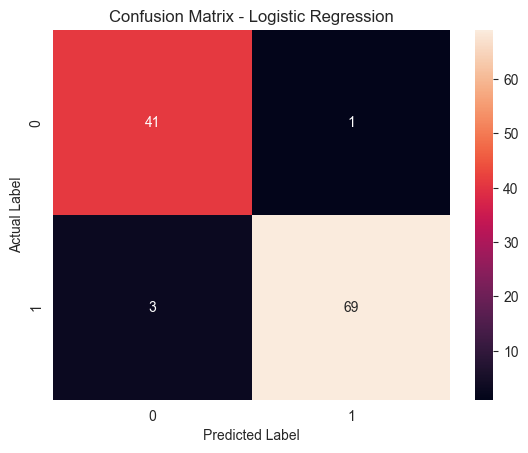

In [134]:
report_text_logreg = classification_report(y_test, y_pred_logreg, target_names=['Benign', 'Malignant'])

print(report_text_logreg)

# Save to .txt file
with open('../outputs/Logistic Regression/reports/classification_report.txt', 'w') as f:
    f.write(report_text_logreg)

cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d')

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.savefig('../outputs/Logistic Regression/plots/confusion_matrix.png', bbox_inches='tight')
plt.show()

### ROC Curve

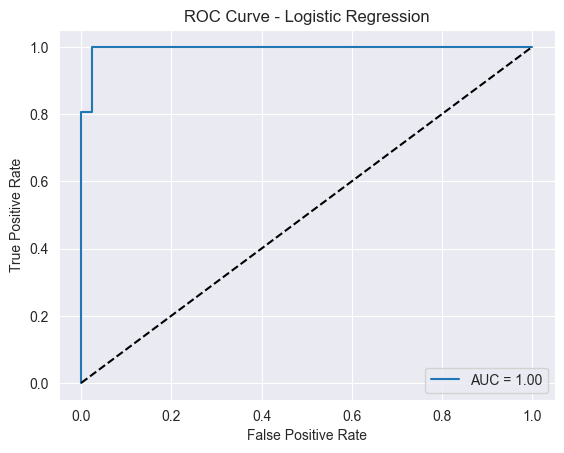

In [135]:
# ROC Curve
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
plt.plot(fpr_logreg, tpr_logreg, label=f"AUC = {roc_auc_score(y_test, y_prob_logreg):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.savefig('../outputs/Logistic Regression/plots/roc_curve.png', bbox_inches='tight')
plt.show()

### Precision Recall Curve

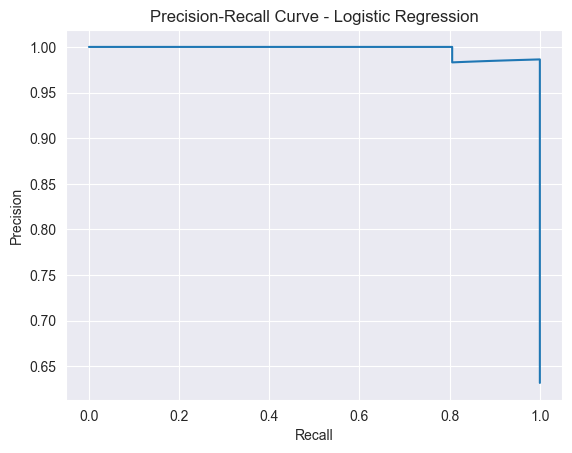

In [136]:
# Precision-Recall Curve
prec_logreg, rec_logreg, _ = precision_recall_curve(y_test, y_prob_logreg)
plt.plot(rec_logreg, prec_logreg)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Logistic Regression")
plt.savefig('../outputs/Logistic Regression/plots/precision_recall_curve.png', bbox_inches='tight')
plt.show()

### Logistic Regression Evaluation

- Precision and recall show model's robustness for detecting malignant tumors.
- AUC-ROC gives us overall classification power.
- Precision-Recall Curve focuses on performance with imbalanced classes.


## 02. Random Forest

### Train & Fit Model

In [137]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and Train Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Save Model
joblib.dump(rf, '../outputs/Random Forest/model/rf_model.pkl')

# Predict Output Values
y_pred_rf = rf.predict(x_test)
y_prob_rf = rf.predict_proba(x_test)[:, 1]

### Confusion Matrix + Reports

              precision    recall  f1-score   support

      Benign       0.91      0.95      0.93        42
   Malignant       0.97      0.94      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



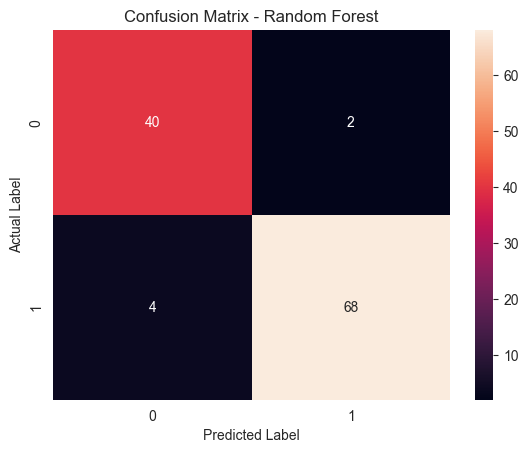

In [138]:
# Create Report Text and Save it
report_text_rf = (
    classification_report(y_test, y_pred_rf, target_names=['Benign', 'Malignant']))
print(report_text_rf)

with open('../outputs/Random Forest/reports/classification_report.txt', 'w') as f:
    f.write(report_text_rf)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d')

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Random Forest")
plt.savefig('../outputs/Random Forest/plots/confusion_matrix.png', bbox_inches='tight')
plt.show()

### ROC Curves

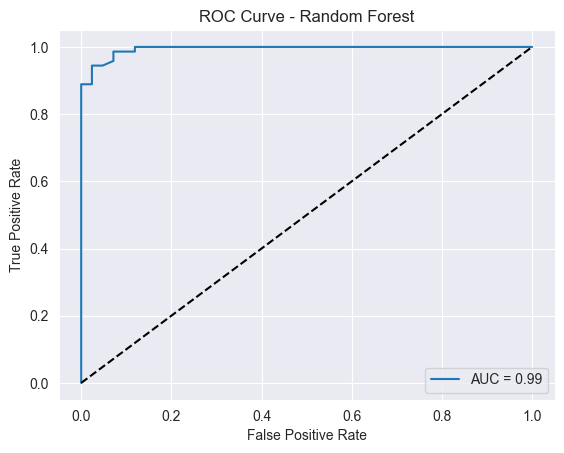

In [139]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f"AUC = {roc_auc_score(y_test, y_prob_rf):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.savefig('../outputs/Random Forest/plots/roc_curve.png', bbox_inches='tight')
plt.show()

### Precision Recall Curve

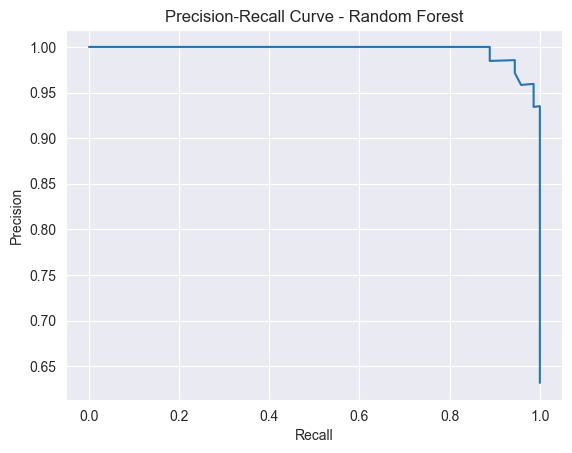

In [140]:
# Precision-Recall Curve
prec_rf, rec_rf, _ = precision_recall_curve(y_test, y_prob_rf)
plt.plot(rec_rf, prec_rf)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Random Forest")
plt.savefig('../outputs/Random Forest/plots/precision_recall_curve.png', bbox_inches='tight')
plt.show()

## 03. SVM

### Train & Fit Model

In [141]:
# Import Model
from sklearn.svm import SVC

# Fit Model
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(x_train, y_train)

# Save Model
joblib.dump(svm, '../outputs/SVM/model/svm_model.pkl')

# Predict Input Values
y_pred_svm = svm.predict(x_test)
y_prob_svm = svm.predict_proba(x_test)[:, 1]

### Confusion Matrix + Reports

              precision    recall  f1-score   support

      Benign       0.95      0.98      0.96        42
   Malignant       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



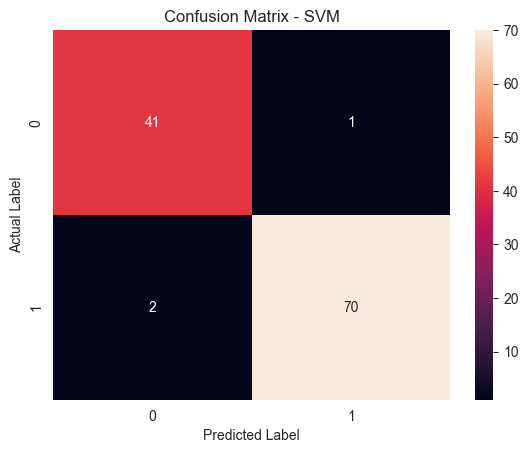

In [142]:
report_text_svm = (
    classification_report(y_test, y_pred_svm, target_names=['Benign', 'Malignant']))

print(report_text_svm)

with open('../outputs/SVM/reports/classification_report.txt', 'w') as f:
    f.write(report_text_svm)

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - SVM")
plt.savefig('../outputs/SVM/plots/confusion_matrix.png', bbox_inches='tight')
plt.show()

### ROC Curves

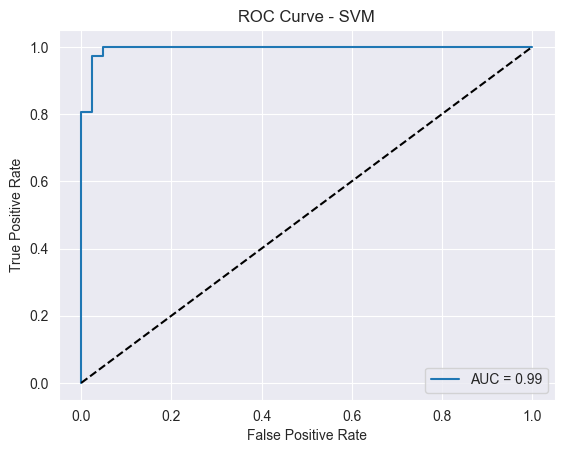

In [143]:
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
plt.plot(fpr_svm, tpr_svm, label=f"AUC = {roc_auc_score(y_test, y_prob_svm):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.savefig('../outputs/SVM/plots/roc_curve.png', bbox_inches='tight')
plt.show()

### Precision Recall Curve

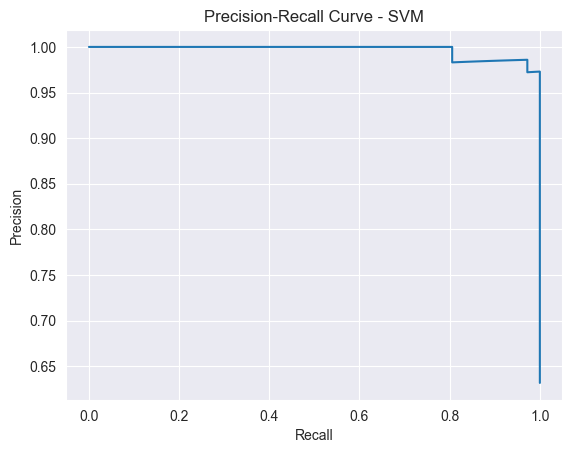

In [144]:
# Precision-Recall Curve
prec_svm, rec_svm, _ = precision_recall_curve(y_test, y_prob_svm)
plt.plot(rec_svm, prec_svm)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - SVM")
plt.savefig('../outputs/SVM/plots/precision_recall_curve.png', bbox_inches='tight')
plt.show()